# ANALISIS DE CONSUMO DE NETFLIX CON PYTHON

## 1. IMPORTACION Y CARGA DE DATOS

In [5]:
from google.colab import files
datos = files.upload()

Saving NetflixViewingHistory.csv to NetflixViewingHistory.csv


In [6]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(datos['NetflixViewingHistory.csv']))

## 2. ANALISIS EXPLORATORIO

In [7]:
df.shape

(4937, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   4937 non-null   object
 1   Date    4937 non-null   object
dtypes: object(2)
memory usage: 77.3+ KB


In [9]:
df.head(50)

,Title,Date
0,Mar de sangre,11-08-23
1,Trabajo incógnito: Parte 2: Proyecto Reinicio,11-08-23
2,"Pablo Escobar, el patrón del mal: Episode 49",11-08-23
3,"Pablo Escobar, el patrón del mal: Episode 48",11-08-23
4,Trabajo incógnito: Parte 2: Rontagio,11-08-23
5,Trabajo incógnito: Parte 2: Poder que mata,11-08-23
6,"Pablo Escobar, el patrón del mal: Episode 47",11-08-23
7,"Pablo Escobar, el patrón del mal: Episode 46",11-08-23
8,Todas las veces que nos enamoramos: El poder d...,10-08-23
9,Todas las veces que nos enamoramos: Meritoria,10-08-23


Vemos que parece que existe un patrón en el que diferentes partes se se separan mediante dos puntos. Vamos a contar en cuantas partes distintas se seperan nuestros contenidos

In [10]:
separacion_lista = df.Title.str.split(pat = ':', expand=False).to_frame()
separacion_lista

,Title
0,[Mar de sangre]
1,"[Trabajo incógnito, Parte 2, Proyecto Reinicio]"
2,"[Pablo Escobar, el patrón del mal, Episode 49]"
3,"[Pablo Escobar, el patrón del mal, Episode 48]"
4,"[Trabajo incógnito, Parte 2, Rontagio]"
...,...
4932,"[How to Get Away With Murder, Temporada 1, N..."
4933,"[How to Get Away With Murder, Temporada 1, V..."
4934,"[How to Get Away With Murder, Temporada 1, S..."
4935,"[How to Get Away With Murder, Temporada 1, E..."


In [11]:
separacion_lista['num_partes'] = separacion_lista.Title.apply(len)
separacion_lista

,Title,num_partes
0,[Mar de sangre],1
1,"[Trabajo incógnito, Parte 2, Proyecto Reinicio]",3
2,"[Pablo Escobar, el patrón del mal, Episode 49]",2
3,"[Pablo Escobar, el patrón del mal, Episode 48]",2
4,"[Trabajo incógnito, Parte 2, Rontagio]",3
...,...,...
4932,"[How to Get Away With Murder, Temporada 1, N...",3
4933,"[How to Get Away With Murder, Temporada 1, V...",3
4934,"[How to Get Away With Murder, Temporada 1, S...",3
4935,"[How to Get Away With Murder, Temporada 1, E...",3


In [12]:
separacion_lista.num_partes.value_counts()

3    3039
2     943
1     591
4     299
6      47
8       8
7       6
5       4
Name: num_partes, dtype: int64

Vamos a analizar los títulos por número de partes a ver si hay algún patrón.

In [13]:
separacion_lista.loc[separacion_lista.num_partes == 1].head(10)

,Title,num_partes
0,[Mar de sangre],1
77,[Felicidad para principiantes],1
87,[Bird Box Barcelona],1
100,[Fragmentos de una mujer],1
106,[Otra ronda],1
115,[Más allá del universo],1
116,[Stromboli],1
127,[Al viento],1
137,[Muchas más hormigas entre las piernas],1
141,[La heredera de la mafia],1


In [14]:
separacion_lista.loc[separacion_lista.num_partes == 2].head(10)

,Title,num_partes
2,"[Pablo Escobar, el patrón del mal, Episode 49]",2
3,"[Pablo Escobar, el patrón del mal, Episode 48]",2
6,"[Pablo Escobar, el patrón del mal, Episode 47]",2
7,"[Pablo Escobar, el patrón del mal, Episode 46]",2
8,"[Todas las veces que nos enamoramos, El poder...",2
9,"[Todas las veces que nos enamoramos, Meritoria]",2
10,"[Pablo Escobar, el patrón del mal, Episode 45]",2
11,"[Pablo Escobar, el patrón del mal, Episode 44]",2
13,"[Pablo Escobar, el patrón del mal, Episode 43]",2
14,"[Todas las veces que nos enamoramos, Campamen...",2


In [15]:
separacion_lista.loc[separacion_lista.num_partes == 3].head(10)

,Title,num_partes
1,"[Trabajo incógnito, Parte 2, Proyecto Reinicio]",3
4,"[Trabajo incógnito, Parte 2, Rontagio]",3
5,"[Trabajo incógnito, Parte 2, Poder que mata]",3
12,"[Trabajo incógnito, Parte 2, Amor en un luga...",3
15,"[Vikingos, Temporada 2, La elección]",3
17,"[Vikingos, Temporada 2, Deshuesado]",3
20,"[Vikingos, Temporada 2, Águila de sangre]",3
21,"[Vikingos, Temporada 2, Imperdonables]",3
22,"[Vikingos, Temporada 2, Respuestas en sangre]",3
23,"[Trabajo incógnito, Parte 2, Reagan y Myc]",3


In [16]:
separacion_lista.loc[separacion_lista.num_partes == 4].head(10)

,Title,num_partes
109,"[Arnold, Miniserie, Parte 3, Estadounidense]",4
110,"[Arnold, Miniserie, Parte 2, Actor]",4
113,"[Arnold, Miniserie, Parte 1, Atleta]",4
129,"[El amor es ciego, Brasil, Temporada 3, ¡Me...",4
182,"[Love, Death & Robots, Volumen 3, Los tres r...",4
238,"[Cazar asesinos, Temporada 3, Destino final,...",4
335,"[El amor es ciego, Brasil, Temporada 2, ¿Ha...",4
336,"[El amor es ciego, Brasil, Temporada 1, La ...",4
351,"[El amor es ciego, Brasil, Temporada 1, Des...",4
352,"[El amor es ciego, Brasil, Temporada 1, Se ...",4


In [17]:
separacion_lista.loc[separacion_lista.num_partes == 5].head(10)

,Title,num_partes
3183,"[Las chicas del cable, Temporada final, Part...",5
3186,"[Las chicas del cable, Temporada final, Part...",5
3187,"[Las chicas del cable, Temporada final, Part...",5
3501,"[BoJack Horseman, Temporada 1, BoJack Horsem...",5


## 3. CREACIÓN DE VARIABLES

Nuestro dataset original tiene muy pocas variables, pero con un poco de trabajo podemos generar nuevas variables. Este proceso se llama "feature extraction".

### 3.1 VARIABLES DERIVADAS DEL TÍTULO

In [18]:
import numpy as np

separacion_lista['tipo'] = np.where(separacion_lista.num_partes <3, 'pelicula', 'serie')
separacion_lista

,Title,num_partes,tipo
0,[Mar de sangre],1,pelicula
1,"[Trabajo incógnito, Parte 2, Proyecto Reinicio]",3,serie
2,"[Pablo Escobar, el patrón del mal, Episode 49]",2,pelicula
3,"[Pablo Escobar, el patrón del mal, Episode 48]",2,pelicula
4,"[Trabajo incógnito, Parte 2, Rontagio]",3,serie
...,...,...,...
4932,"[How to Get Away With Murder, Temporada 1, N...",3,serie
4933,"[How to Get Away With Murder, Temporada 1, V...",3,serie
4934,"[How to Get Away With Murder, Temporada 1, S...",3,serie
4935,"[How to Get Away With Murder, Temporada 1, E...",3,serie


In [19]:
df = pd.concat([df,separacion_lista['tipo']], axis = 1)
df

,Title,Date,tipo
0,Mar de sangre,11-08-23,pelicula
1,Trabajo incógnito: Parte 2: Proyecto Reinicio,11-08-23,serie
2,"Pablo Escobar, el patrón del mal: Episode 49",11-08-23,pelicula
3,"Pablo Escobar, el patrón del mal: Episode 48",11-08-23,pelicula
4,Trabajo incógnito: Parte 2: Rontagio,11-08-23,serie
...,...,...,...
4932,How to Get Away With Murder: Temporada 1: No s...,04-08-16,serie
4933,How to Get Away With Murder: Temporada 1: Vamo...,04-08-16,serie
4934,How to Get Away With Murder: Temporada 1: Sonr...,04-08-16,serie
4935,How to Get Away With Murder: Temporada 1: Es t...,04-08-16,serie


Vamos a dividir los títulos en sus diferentes niveles y generar así nuevas variables

In [20]:
separacion_cols = df.Title.str.split(pat = ':', expand=True)
separacion_cols

,0,1,2,3,4,5,6,7
0,Mar de sangre,None,None,None,None,None,None,None
1,Trabajo incógnito,Parte 2,Proyecto Reinicio,None,None,None,None,None
2,"Pablo Escobar, el patrón del mal",Episode 49,None,None,None,None,None,None
3,"Pablo Escobar, el patrón del mal",Episode 48,None,None,None,None,None,None
4,Trabajo incógnito,Parte 2,Rontagio,None,None,None,None,None
...,...,...,...,...,...,...,...,...
4932,How to Get Away With Murder,Temporada 1,No somos amigos,None,None,None,None,None
4933,How to Get Away With Murder,Temporada 1,Vamos a llegar a sacar con la pala,None,None,None,None,None
4934,How to Get Away With Murder,Temporada 1,Sonreír o ir a la cárcel,None,None,None,None,None
4935,How to Get Away With Murder,Temporada 1,Es todo culpa de ella,None,None,None,None,None


In [21]:
separacion_cols.columns = ['nivel1','nivel2','nivel3','nivel4','nivel5','nivel6','nivel7','nivel8']
separacion_cols

,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6,nivel7,nivel8
0,Mar de sangre,None,None,None,None,None,None,None
1,Trabajo incógnito,Parte 2,Proyecto Reinicio,None,None,None,None,None
2,"Pablo Escobar, el patrón del mal",Episode 49,None,None,None,None,None,None
3,"Pablo Escobar, el patrón del mal",Episode 48,None,None,None,None,None,None
4,Trabajo incógnito,Parte 2,Rontagio,None,None,None,None,None
...,...,...,...,...,...,...,...,...
4932,How to Get Away With Murder,Temporada 1,No somos amigos,None,None,None,None,None
4933,How to Get Away With Murder,Temporada 1,Vamos a llegar a sacar con la pala,None,None,None,None,None
4934,How to Get Away With Murder,Temporada 1,Sonreír o ir a la cárcel,None,None,None,None,None
4935,How to Get Away With Murder,Temporada 1,Es todo culpa de ella,None,None,None,None,None


In [22]:
df = pd.concat([df,separacion_cols], axis = 1)
df

,Title,Date,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6,nivel7,nivel8
0,Mar de sangre,11-08-23,pelicula,Mar de sangre,None,None,None,None,None,None,None
1,Trabajo incógnito: Parte 2: Proyecto Reinicio,11-08-23,serie,Trabajo incógnito,Parte 2,Proyecto Reinicio,None,None,None,None,None
2,"Pablo Escobar, el patrón del mal: Episode 49",11-08-23,pelicula,"Pablo Escobar, el patrón del mal",Episode 49,None,None,None,None,None,None
3,"Pablo Escobar, el patrón del mal: Episode 48",11-08-23,pelicula,"Pablo Escobar, el patrón del mal",Episode 48,None,None,None,None,None,None
4,Trabajo incógnito: Parte 2: Rontagio,11-08-23,serie,Trabajo incógnito,Parte 2,Rontagio,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
4932,How to Get Away With Murder: Temporada 1: No s...,04-08-16,serie,How to Get Away With Murder,Temporada 1,No somos amigos,None,None,None,None,None
4933,How to Get Away With Murder: Temporada 1: Vamo...,04-08-16,serie,How to Get Away With Murder,Temporada 1,Vamos a llegar a sacar con la pala,None,None,None,None,None
4934,How to Get Away With Murder: Temporada 1: Sonr...,04-08-16,serie,How to Get Away With Murder,Temporada 1,Sonreír o ir a la cárcel,None,None,None,None,None
4935,How to Get Away With Murder: Temporada 1: Es t...,04-08-16,serie,How to Get Away With Murder,Temporada 1,Es todo culpa de ella,None,None,None,None,None


### 3.2 VARIABLES DERIVADAS DE LA FECHA

Podemos extraer los diferentes compontentes de una fecha para generar nuevas variables.

In [23]:
df['fecha'] = pd.to_datetime(df.Date)
df.drop(columns = 'Date',inplace = True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6,nivel7,nivel8,fecha
0,Mar de sangre,pelicula,Mar de sangre,None,None,None,None,None,None,None,2023-11-08
1,Trabajo incógnito: Parte 2: Proyecto Reinicio,serie,Trabajo incógnito,Parte 2,Proyecto Reinicio,None,None,None,None,None,2023-11-08
2,"Pablo Escobar, el patrón del mal: Episode 49",pelicula,"Pablo Escobar, el patrón del mal",Episode 49,None,None,None,None,None,None,2023-11-08
3,"Pablo Escobar, el patrón del mal: Episode 48",pelicula,"Pablo Escobar, el patrón del mal",Episode 48,None,None,None,None,None,None,2023-11-08
4,Trabajo incógnito: Parte 2: Rontagio,serie,Trabajo incógnito,Parte 2,Rontagio,None,None,None,None,None,2023-11-08
...,...,...,...,...,...,...,...,...,...,...,...
4932,How to Get Away With Murder: Temporada 1: No s...,serie,How to Get Away With Murder,Temporada 1,No somos amigos,None,None,None,None,None,2016-04-08
4933,How to Get Away With Murder: Temporada 1: Vamo...,serie,How to Get Away With Murder,Temporada 1,Vamos a llegar a sacar con la pala,None,None,None,None,None,2016-04-08
4934,How to Get Away With Murder: Temporada 1: Sonr...,serie,How to Get Away With Murder,Temporada 1,Sonreír o ir a la cárcel,None,None,None,None,None,2016-04-08
4935,How to Get Away With Murder: Temporada 1: Es t...,serie,How to Get Away With Murder,Temporada 1,Es todo culpa de ella,None,None,None,None,None,2016-04-08


In [24]:
df.set_index('fecha', inplace = True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6,nivel7,nivel8
fecha,,,,,,,,,,
2023-11-08,Mar de sangre,pelicula,Mar de sangre,None,None,None,None,None,None,None
2023-11-08,Trabajo incógnito: Parte 2: Proyecto Reinicio,serie,Trabajo incógnito,Parte 2,Proyecto Reinicio,None,None,None,None,None
2023-11-08,"Pablo Escobar, el patrón del mal: Episode 49",pelicula,"Pablo Escobar, el patrón del mal",Episode 49,None,None,None,None,None,None
2023-11-08,"Pablo Escobar, el patrón del mal: Episode 48",pelicula,"Pablo Escobar, el patrón del mal",Episode 48,None,None,None,None,None,None
2023-11-08,Trabajo incógnito: Parte 2: Rontagio,serie,Trabajo incógnito,Parte 2,Rontagio,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
2016-04-08,How to Get Away With Murder: Temporada 1: No s...,serie,How to Get Away With Murder,Temporada 1,No somos amigos,None,None,None,None,None
2016-04-08,How to Get Away With Murder: Temporada 1: Vamo...,serie,How to Get Away With Murder,Temporada 1,Vamos a llegar a sacar con la pala,None,None,None,None,None
2016-04-08,How to Get Away With Murder: Temporada 1: Sonr...,serie,How to Get Away With Murder,Temporada 1,Sonreír o ir a la cárcel,None,None,None,None,None


Creamos una función para extraer los componentes.

In [25]:
def atributos_fechas(data):
  data['año'] = data.index.year
  data['mes'] = data.index.month_name()
  data['dia_mes'] = data.index.day
  data['dia_semana'] = data.index.day_name()
  return(data)

In [26]:
atributos_fechas(df)

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6,nivel7,nivel8,año,mes,dia_mes,dia_semana
fecha,,,,,,,,,,,,,,
2023-11-08,Mar de sangre,pelicula,Mar de sangre,None,None,None,None,None,None,None,2023,November,8,Wednesday
2023-11-08,Trabajo incógnito: Parte 2: Proyecto Reinicio,serie,Trabajo incógnito,Parte 2,Proyecto Reinicio,None,None,None,None,None,2023,November,8,Wednesday
2023-11-08,"Pablo Escobar, el patrón del mal: Episode 49",pelicula,"Pablo Escobar, el patrón del mal",Episode 49,None,None,None,None,None,None,2023,November,8,Wednesday
2023-11-08,"Pablo Escobar, el patrón del mal: Episode 48",pelicula,"Pablo Escobar, el patrón del mal",Episode 48,None,None,None,None,None,None,2023,November,8,Wednesday
2023-11-08,Trabajo incógnito: Parte 2: Rontagio,serie,Trabajo incógnito,Parte 2,Rontagio,None,None,None,None,None,2023,November,8,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-08,How to Get Away With Murder: Temporada 1: No s...,serie,How to Get Away With Murder,Temporada 1,No somos amigos,None,None,None,None,None,2016,April,8,Friday
2016-04-08,How to Get Away With Murder: Temporada 1: Vamo...,serie,How to Get Away With Murder,Temporada 1,Vamos a llegar a sacar con la pala,None,None,None,None,None,2016,April,8,Friday
2016-04-08,How to Get Away With Murder: Temporada 1: Sonr...,serie,How to Get Away With Murder,Temporada 1,Sonreír o ir a la cárcel,None,None,None,None,None,2016,April,8,Friday


## 4. ANALISIS

¿Cuanto tiempo hace que tengo contratado Netflix?

In [41]:
from datetime import date

hoy = pd.Timestamp(date.today())

primer_dia = df.index.min()

tiempo = hoy - primer_dia

print(f'Franca, llevas usando Netflix {tiempo.days} dias')

Franca, llevas usando Netflix 2773 dias


¿Cuanto me he gastado en Netflix hasta ahora?

In [40]:
# coste_mensual_2016 = 5190
# coste_mensual_2017_18 = 7390
# coste_mensual_2019_20 = 8.990
# coste_mensual_2021_22_23 = 10700
# media por mes = 8756.25

coste_mensual = 8756.25

gasto = tiempo.days / 30 * coste_mensual

print(f'Franca, hasta ahora has gastado {gasto} pesos en Netflix')

Franca, hasta ahora has gastado 809369.375 pesos en Netflix


¿Cuanto tiempo de mi vida le dedico cada año a Netflix?

In [29]:
media_min_serie = 45
media_min_peli = 100

consumo = df.loc[df.año < 2024].groupby('tipo').Title.count()

minutos_pelis_año = consumo['pelicula'] * media_min_peli / 3

minutos_series_año = consumo['serie'] * media_min_serie / 3

dias_pelis_año = minutos_pelis_año / 60 / 24

dias_series_año = minutos_series_año / 60 / 24

print(f'Franca, al año dedicas {round(dias_series_año)} dias de tu vida a ver series y {round(dias_pelis_año)} dias de tu vida a ver pelis')

Franca, al año dedicas 35 dias de tu vida a ver series y 36 dias de tu vida a ver pelis


¿Cuales son las 10 series de las que he visto más capítulos?

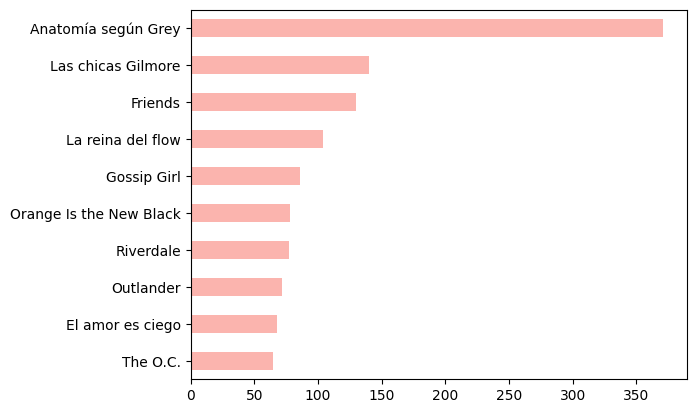

In [30]:
df.loc[df.tipo == 'serie'].nivel1.value_counts(ascending = True).tail(10).plot.barh(cmap = 'Pastel1');

Vamos a hacer una consulta de los títulos que incluyan Pinocho en Title.


In [31]:
df[df.Title.str.contains('Pinocho')]

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6,nivel7,nivel8,año,mes,dia_mes,dia_semana
fecha,,,,,,,,,,,,,,
2023-05-06,Pinocho de Guillermo del Toro: Cine tallado a ...,pelicula,Pinocho de Guillermo del Toro,Cine tallado a mano,None,None,None,None,None,None,2023,May,6,Saturday
2023-05-06,Pinocho de Guillermo del Toro,pelicula,Pinocho de Guillermo del Toro,None,None,None,None,None,None,None,2023,May,6,Saturday
2021-08-03,Las chicas Gilmore: Temporada 3: Esas son cuer...,serie,Las chicas Gilmore,Temporada 3,"Esas son cuerdas, Pinocho",None,None,None,None,None,2021,August,3,Tuesday


¿Qué día de la semana suelo ver más series?

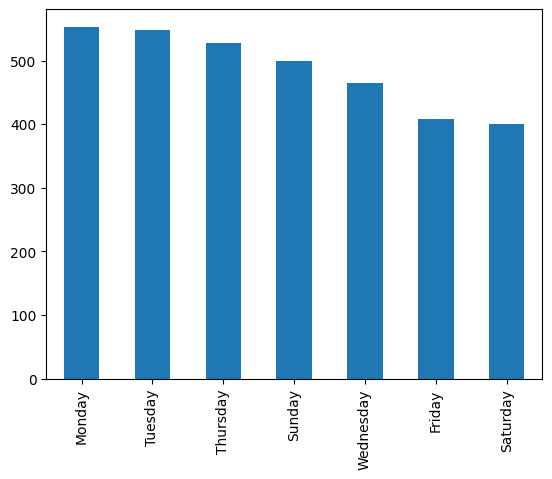

In [32]:
df.loc[df.tipo == 'serie', 'dia_semana'].value_counts().plot(kind = 'bar');

¿Existen diferencias en cuando veo Netflix entre series y películas?

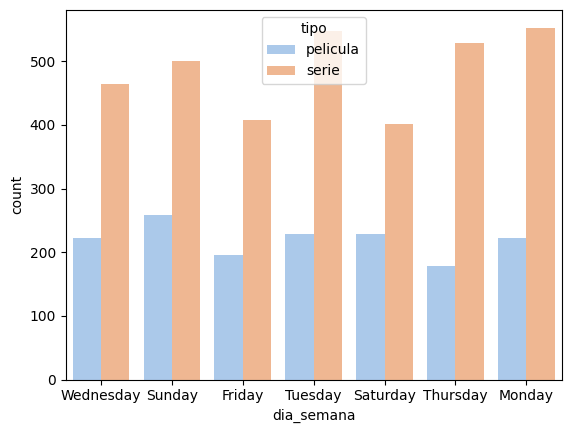

In [33]:
import seaborn as sns

sns.countplot(data = df, x = 'dia_semana', hue = 'tipo', palette= 'pastel');

¿El consumo a lo largo del año es constante o hay meses que consumo más?

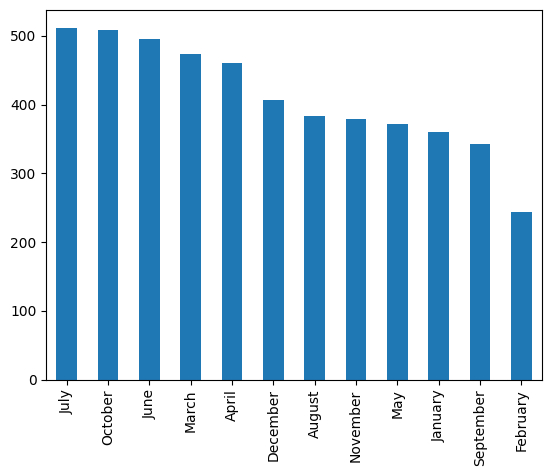

In [34]:
df.loc[df.año < 2024].mes.value_counts().plot.bar();

¿Afectó el confinamiento a la cantidad de uso que hice de Netflix?

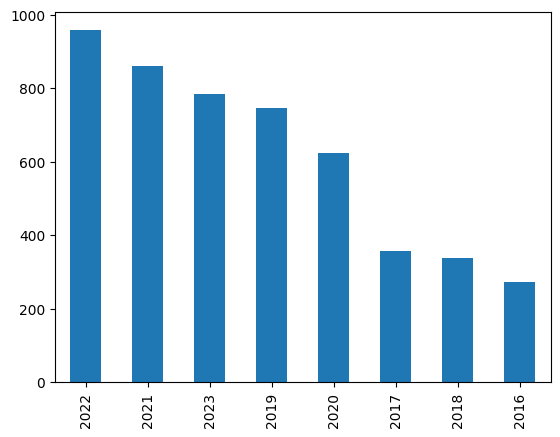

In [35]:
df.año.value_counts().plot.bar();